# Simple K Means Demonstration

Groups the points in clusters based on their position.

Initial Condition


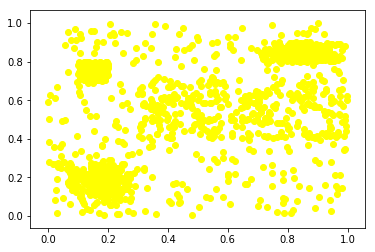

Number of seeds (Groups) : 6
Seed : 0 placed at [0.7275633725641097, 0.8136992412721739]
Seed : 1 placed at [0.792139079655381, 0.9811894951057658]
Seed : 2 placed at [0.902530441077321, 0.3017415049274138]
Seed : 3 placed at [0.1719472165283099, 0.6410514808804202]
Seed : 4 placed at [0.19137751988135365, 0.5393499227818707]
Seed : 5 placed at [0.7989040413635512, 0.27081986363235]
Iteration : 1


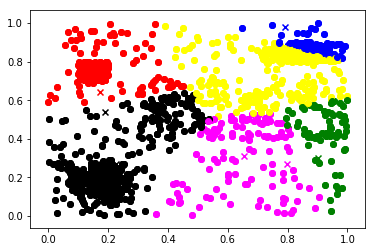

Iteration : 2


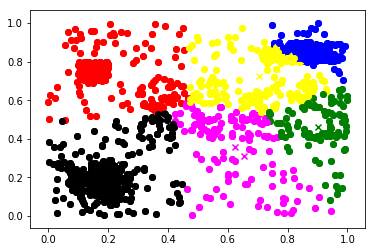

Iteration : 3


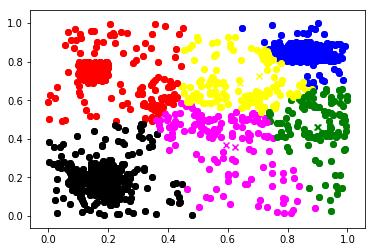

Iteration : 4


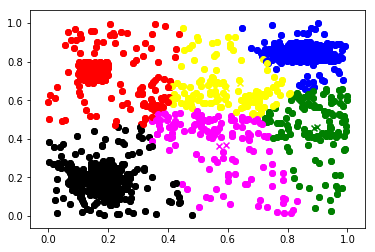

Iteration : 5


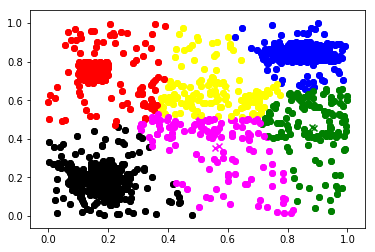

Iteration : 6


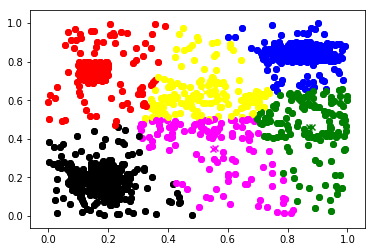

Iteration : 7


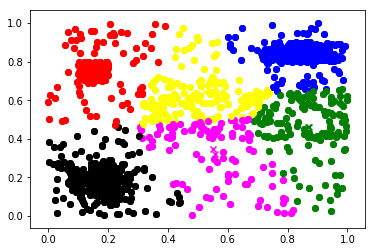

Iteration : 8


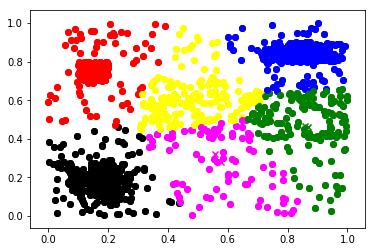

Iteration : 9


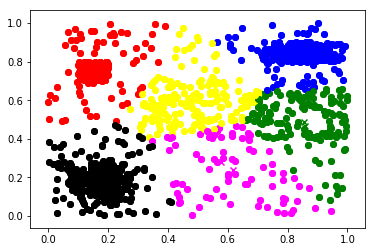

Iteration : 10


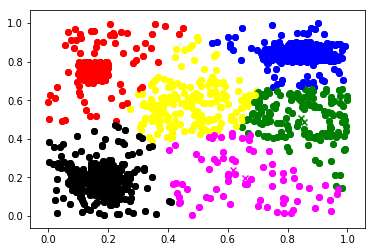

Iteration : 11


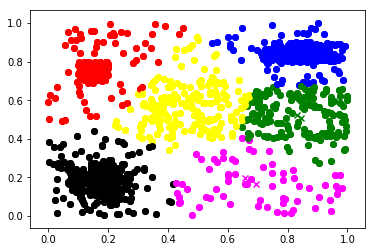

Iteration : 12


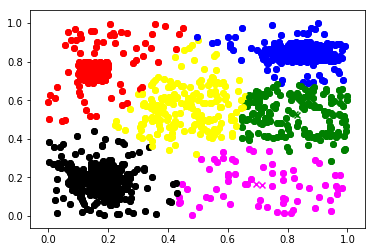

Iteration : 13


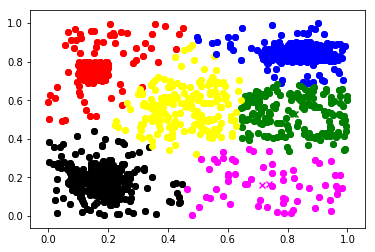

Iteration : 14


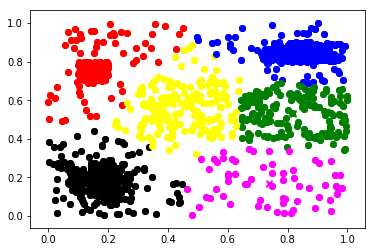

Iteration : 15


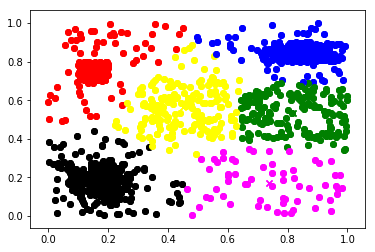

Iteration : 16


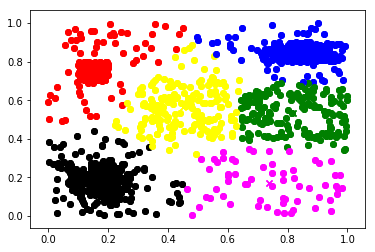

Iteration : 17


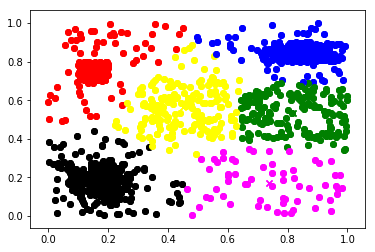

Iteration : 18


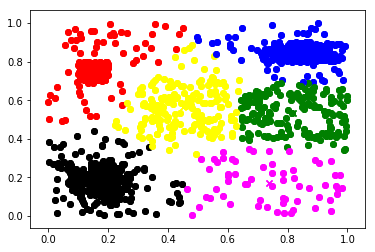

Iteration : 19


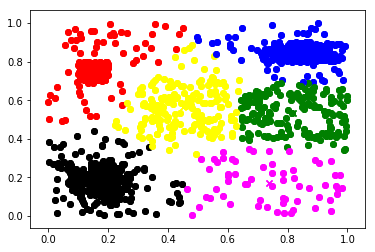

Iteration : 20


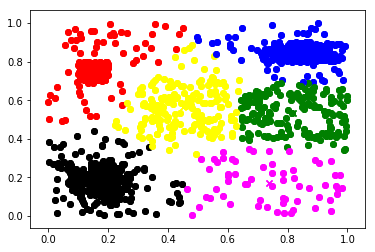

Iteration : 21


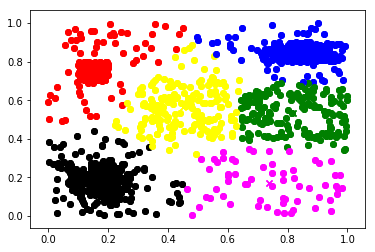

Iteration : 22


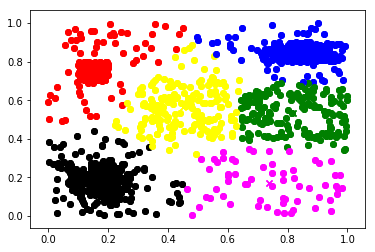

Iteration : 23


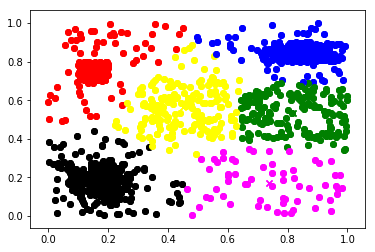

Iteration : 24


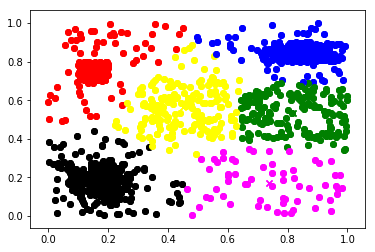

Iteration : 25


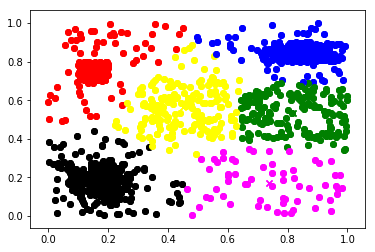

24


In [25]:
import random
from math import sqrt

import matplotlib.pyplot as plt


#Define the variables
clusternumber = 6
maxiterations = 25

def euclideandistance(individual, seed):
    dist = 0
    for idx, elem_seed in enumerate(seed):
        dist += (individual[idx] - elem_seed) ** 2
    dist = sqrt(dist)
    return dist


# buscar seed mais proxima
def get_seed(individual, seeds):
    lowest_dist = 1000
    currseed = 0
    for idx, seed in enumerate(seeds):
        distance = euclideandistance(individual[1:], seed)
        if distance < lowest_dist:
            lowest_dist = distance
            currseed = idx
    return currseed


def get_color(num):
    if num == 0:
        return 'yellow'
    elif num == 1:
        return 'blue'
    elif num == 2:
        return 'green'
    elif num == 3:
        return 'red'
    elif num == 4:
        return 'black'
    elif num == 5:
        return 'magenta'
    elif num == 6:
        return 'cyan'
    else:
        return 'gray'
    #return 'gray'


veclis = list()

#place dots randomly 

for k in range(0, 250):
    veclis.append([0,random.random(),random.random(),random.random()])
    veclis.append([0, random.uniform(random.uniform(0,0.2), random.uniform(0.2,0.3)), random.uniform(random.uniform(0,0.2), random.uniform(0.2,0.3))])
    veclis.append([0, random.uniform(random.uniform(0.7,0.9), random.uniform(0.8,1)), random.uniform(0.8, 0.9)])
    veclis.append([0, random.uniform(0.3, 1), random.uniform(0.4, 0.7)])
    veclis.append([0, random.uniform(0.1,0.2), random.uniform(0.7, 0.8)])


#colocar ainda mais ruido
for k in range(0, 100):
    veclis.append([0,random.random(),random.random(),random.random()])
    

print("Initial Condition")    
for i in veclis:
    plt.scatter(i[1], i[2], color=get_color(i[0]))
plt.show()

print("Number of seeds (Groups) : " + str(clusternumber))
# colocar seeds ao calhas
veckmeans = list()  ### Le Random
for k in range(0, clusternumber):
    # veckmeans.append([random.random(),random.random(),random.random()])
    veckmeans.append([random.random(), random.random()])
    print("Seed : " + str(k) + " placed at " + str(veckmeans[k]))
    

    
for xx in range(0, maxiterations):
    # ver qual a seed
    for i in veclis:
        i[0] = get_seed(i, veckmeans)

    # debug plot

    for i in veclis:
        plt.scatter(i[1], i[2], color=get_color(i[0]))

    for i, seed in enumerate(veckmeans):
        plt.scatter(seed[0], seed[1], color=get_color(i), marker='x')

    

    # recentrar os centroides

    for i in range(0, len(veckmeans)):
        for ix, elem in enumerate(veckmeans[i]):
            veckmeans[i][ix] = 0
        cnt = 0
        for idx, elem in enumerate(veclis):
            if elem[0] == i:
                cnt = cnt + 1
                for ix, elem in enumerate(veckmeans[i]):
                    # print elem#for itm in range(0,len(elem)):
                    veckmeans[i][ix] = veckmeans[i][ix] + veclis[idx][ix + 1]

        for ix, elem in enumerate(veckmeans[i]):
            # print veckmeans[i][ix]
            if cnt > 0:
                veckmeans[i][ix] = veckmeans[i][ix] / cnt
            #print (veckmeans[i][ix])

    for i in veclis:
        plt.scatter(i[1], i[2], color=get_color(i[0]))
    for i, seed in enumerate(veckmeans):
        plt.scatter(seed[0], seed[1], color=get_color(i), marker='x')
    print("Iteration : " + str(xx+1))
    plt.show()
    
print ("Complete")
plt.show()
